# 20210828 Initial Analysis

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2021_08_28 as redu
night = '20210828'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import warnings
warnings.filterwarnings('ignore')

## Real time plots

50% EE radius = 0.350"


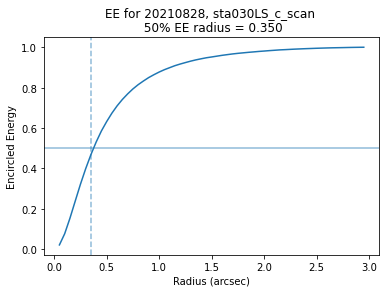

In [4]:
### EDIT ME
test_img_base = 'sta030LS_c_scan'
###


from astropy.table import Table
ee = Table.read(root_dir + 'reduce/Fld2/ee/' + test_img_base + '_clean_ee.txt', format='ascii')

plt.plot(ee['Radius'], ee['EE'])
plt.xlabel('Radius (arcsec)')
plt.ylabel('Encircled Energy')

fdx = np.where(ee['EE'] < 0.5)[0][-1]
fwhm = ee['Radius'][fdx]

plt.axhline(0.5, alpha=0.5)
plt.axvline(fwhm, ls ='--',alpha=0.5)
plt.title(f"EE for {night}, {test_img_base} \n 50% EE radius = {fwhm:.3f}")

print(f'50% EE radius = {fwhm:.3f}"')

Play with a star list and look at trends in FWHM, etc. 

x: fwhm_x_avg = 0.56" fwhm_x_med = 0.55" fwhm_x_std = 0.09"
x: fwhm_x_avg = 0.56" fwhm_x_med = 0.55" fwhm_x_std = 0.09"


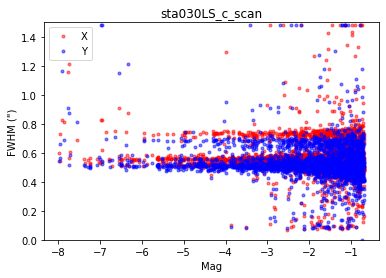

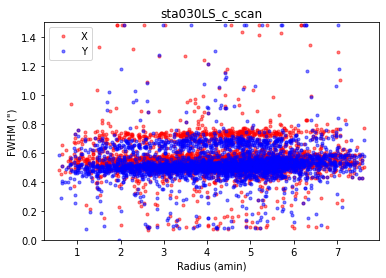

In [5]:
stars = Table.read(root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars.txt', format='ascii')

# Get the plate scale
img, hdr = fits.getdata(root_dir + 'Fld2/' + test_img_base + '.fits', header=True)
scale = util.get_plate_scale(img, hdr)
del img
del hdr

plt.figure()
plt.plot(stars['mag'], stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(stars['mag'], stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Mag')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

plt.figure()
r = np.hypot(stars['xcentroid'] - (stars['xcentroid'].max() / 2.0), 
             stars['ycentroid'] - (stars['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(r, stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Radius (amin)')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

fwhm_x_avg, fwhm_x_med, fwhm_x_std = sigma_clipped_stats(stars['x_fwhm'] * scale)
fwhm_y_avg, fwhm_y_med, fwhm_y_std = sigma_clipped_stats(stars['y_fwhm'] * scale)
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')

Text(0.5, 1.0, 'sta030LS_c_scan\n Mag cut at -3')

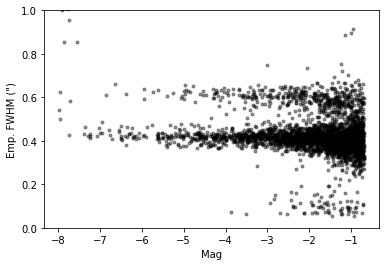

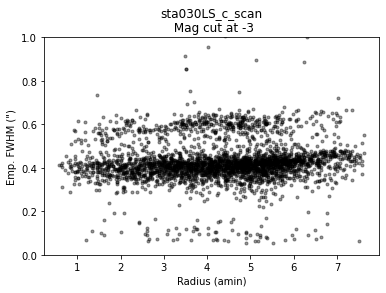

In [6]:
stars2 = Table.read(root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats.fits')
plt.figure()
plt.plot(stars2['mag'], stars2['fwhm_emp'] * scale, 'k.', alpha=0.4)
plt.ylim(0, 1)
plt.xlabel('Mag')
plt.ylabel('Emp. FWHM (")')

# Cropping stars based on magnitude
# Replace stars2_crop with stars2 if no filtering is desired
#stars2_crop = stars2[stars2['mag'] < -2.5]
stars2_crop = stars2

plt.figure()
r = np.hypot(stars2_crop['xcentroid'] - (stars2_crop['xcentroid'].max() / 2.0), 
             stars2_crop['ycentroid'] - (stars2_crop['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars2_crop['fwhm_emp'] * scale, 'k.', alpha=0.4)
plt.ylim(0, 1)
plt.xlabel('Radius (amin)')
plt.ylabel('Emp. FWHM (")')
plt.title(test_img_base + "\n Mag cut at -3")

NOTE: extra stars on top edge and low edges here look like noise. Filtering starlists is advised

### STATS

In [7]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS_IVBR.fits')

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


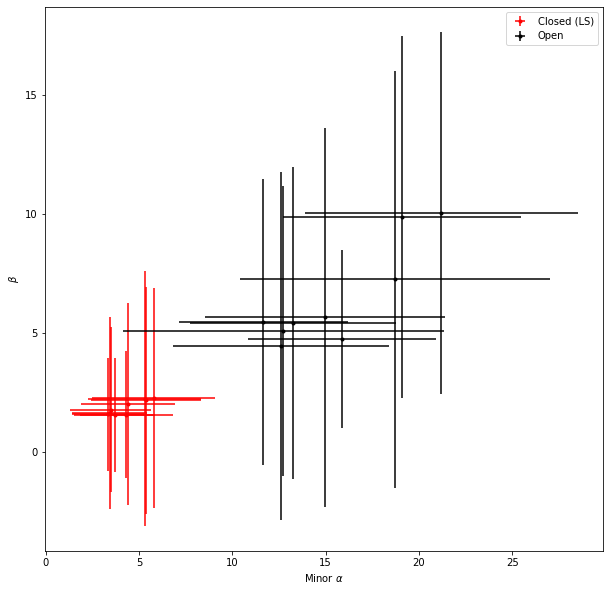

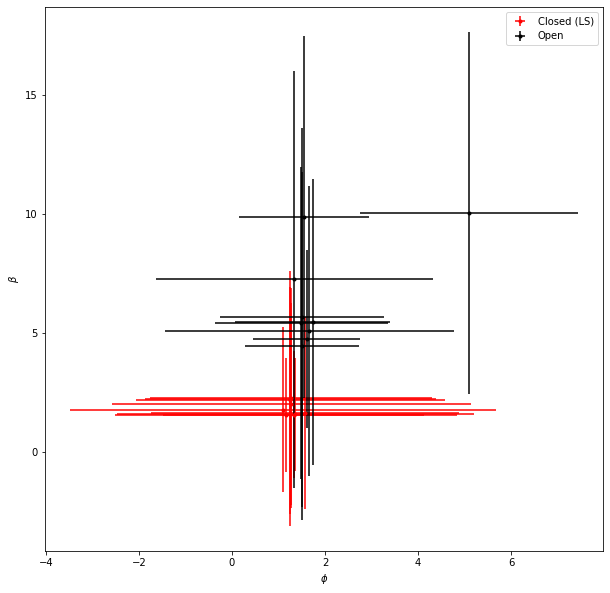

In [8]:
# stats by star
# FILTER INCLUDED
stats_c = Table.read(root_dir + 'reduce/stats/stats_LS_IVBR_mdp.fits')
stats_o = Table.read(root_dir + 'reduce/stats/stats_open_IVBR_mdp.fits')

# stats by stack? => doesn't work
#stats_c = Table.read(root_dir + 'reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits')
#stats_o = Table.read(root_dir + 'reduce/stacks/fld2_stack__o_stars_stats.fits')

print(stats.colnames)

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'Minor $\alpha$')
plt.ylabel(r'$\beta$')
plt.legend()

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta$')
plt.legend()

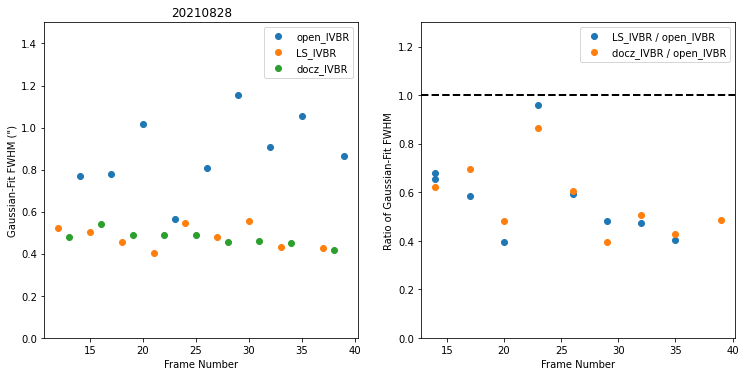

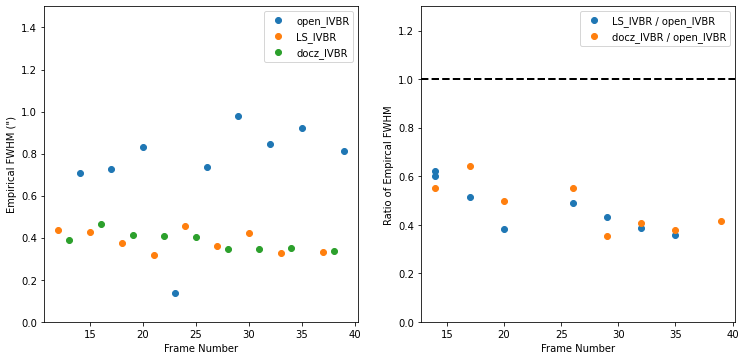

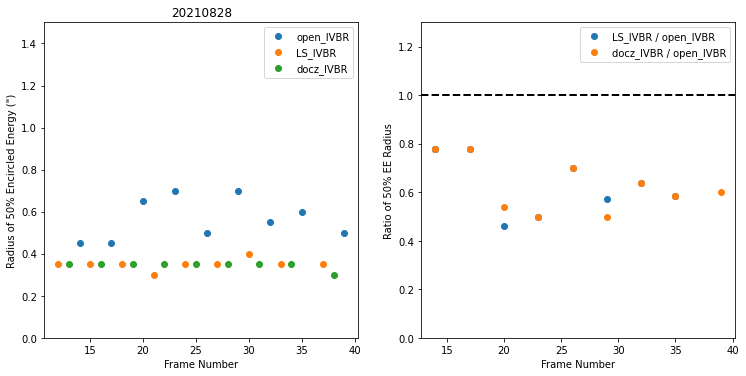

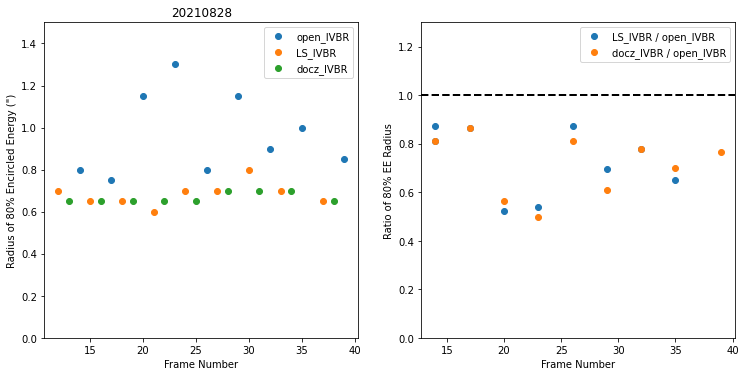

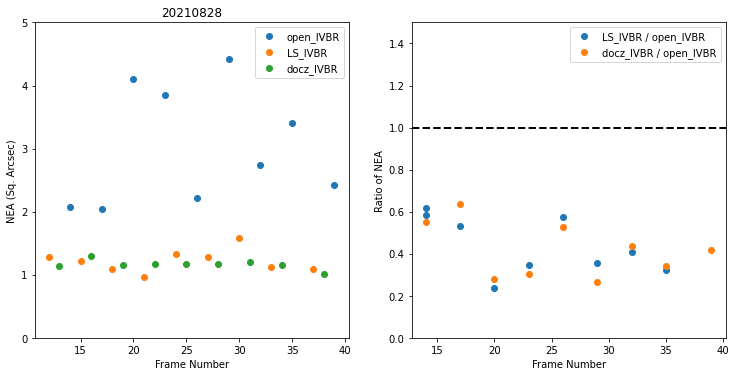

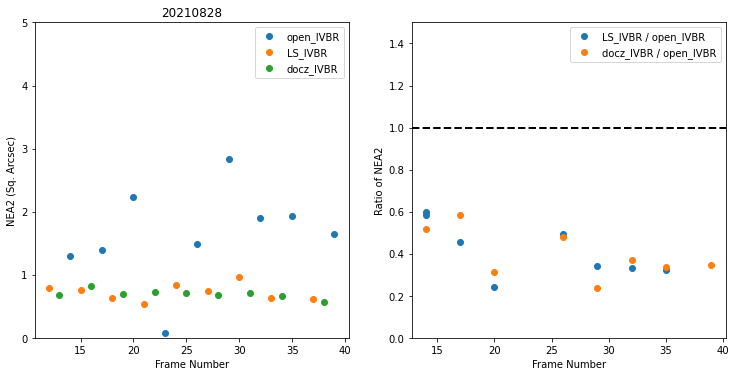

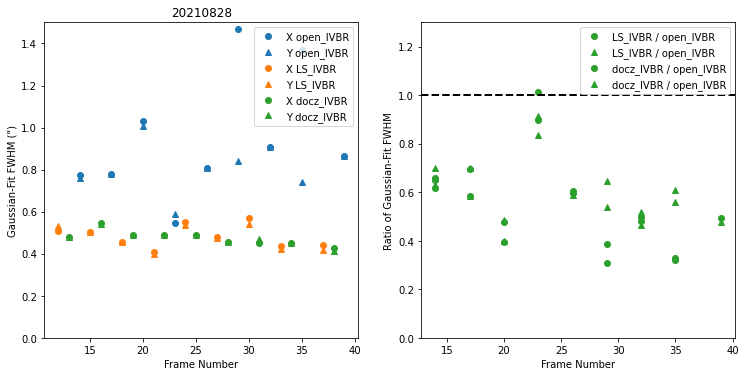

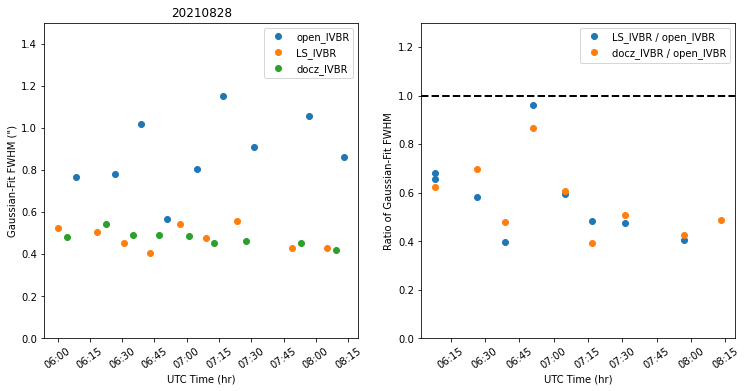

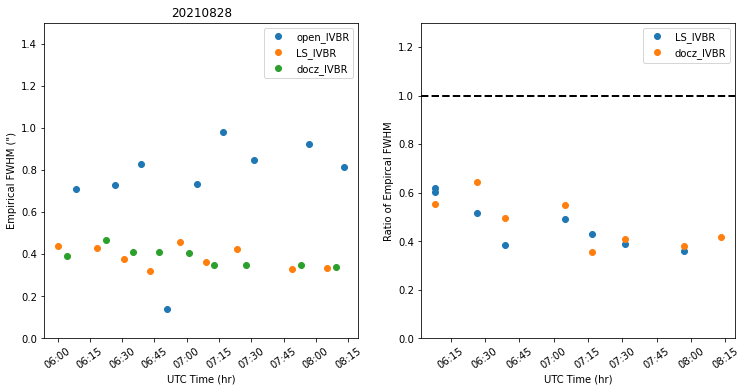

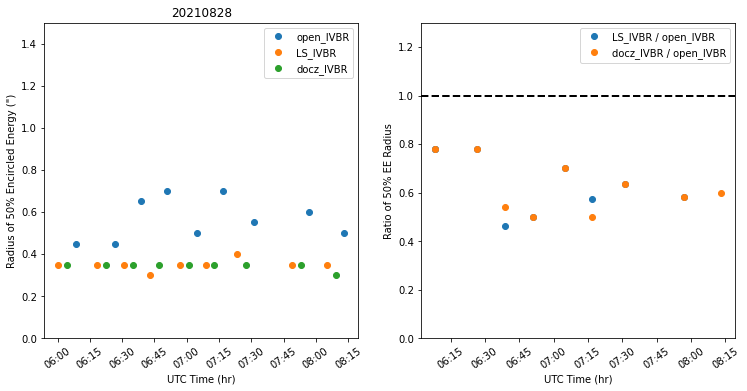

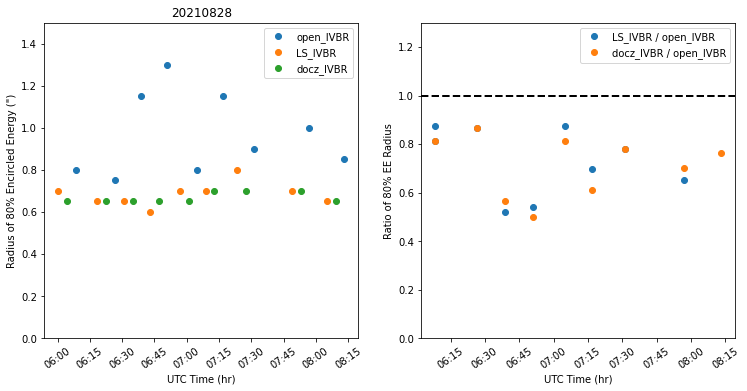

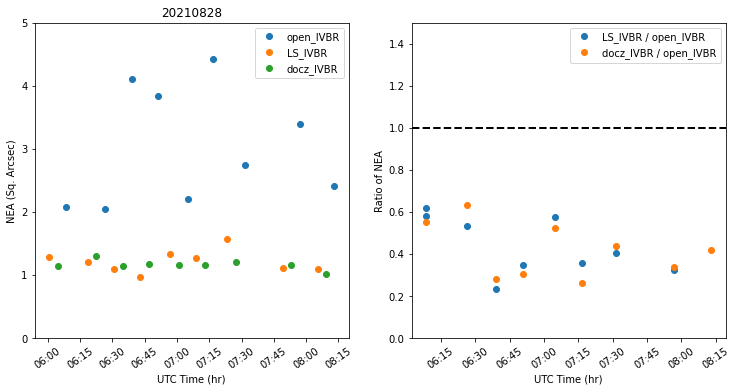

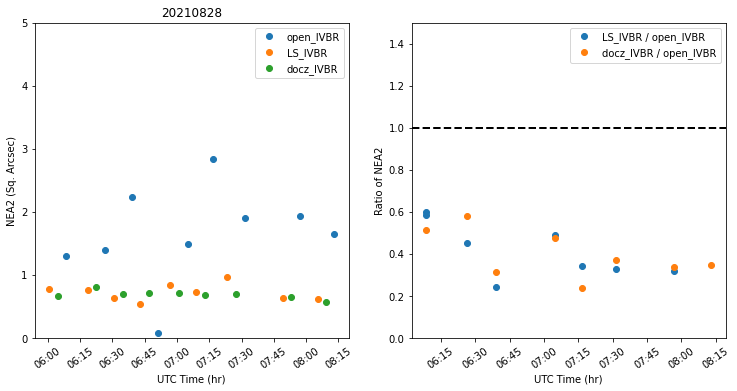

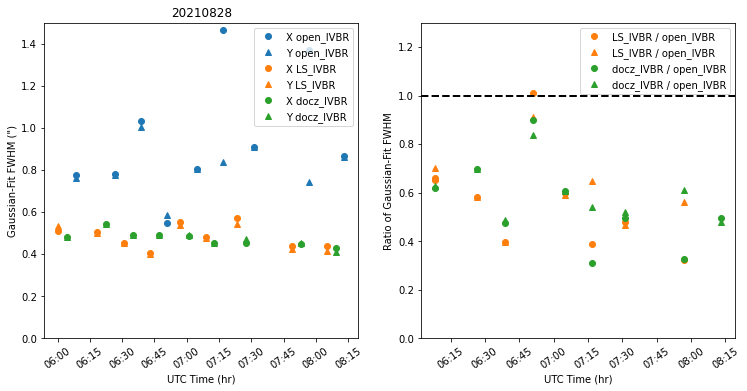

In [10]:
## Must have completed stats

#suffixes = list(redu.dict_suffix.keys())
suffixes = ['open_IVBR', 'LS_IVBR', 'docz_IVBR']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

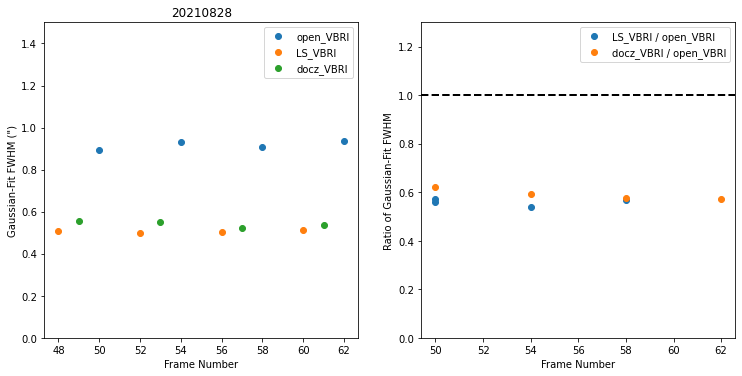

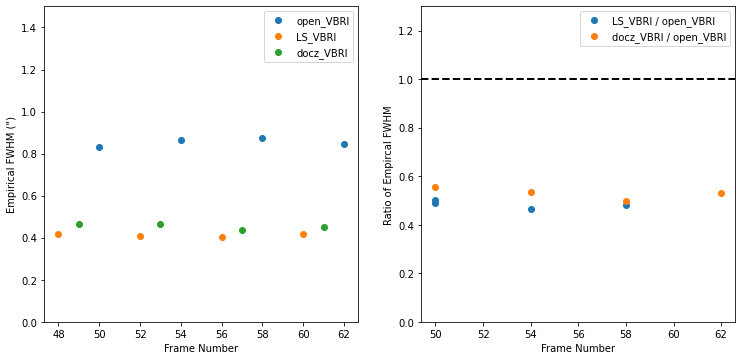

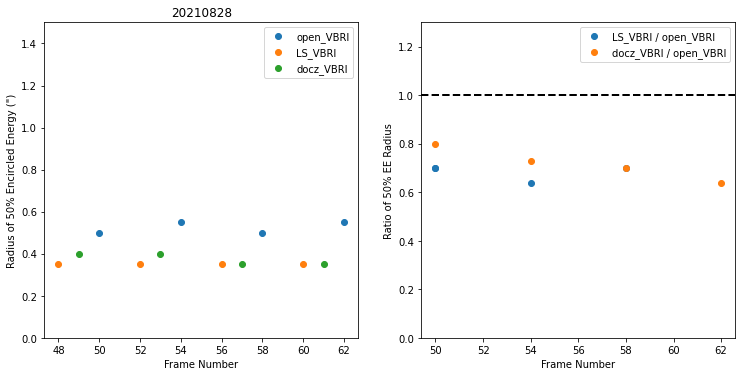

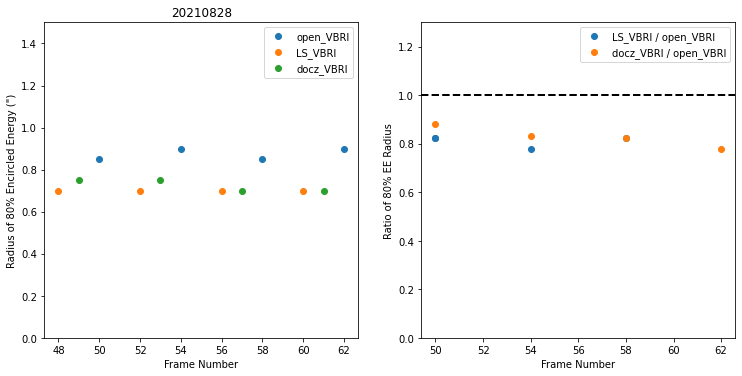

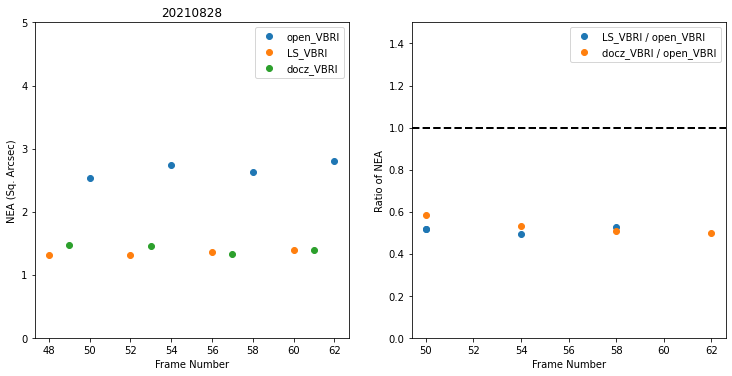

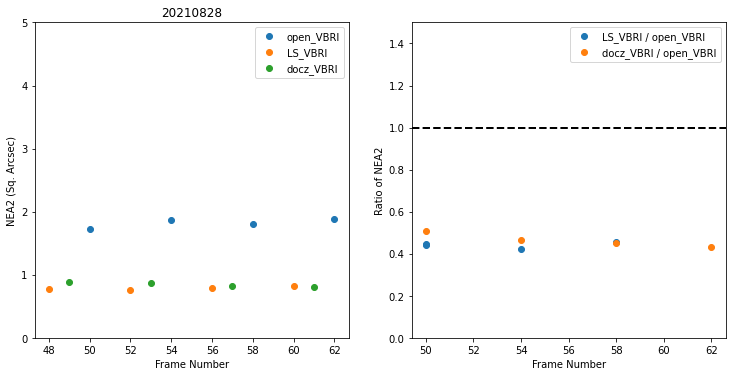

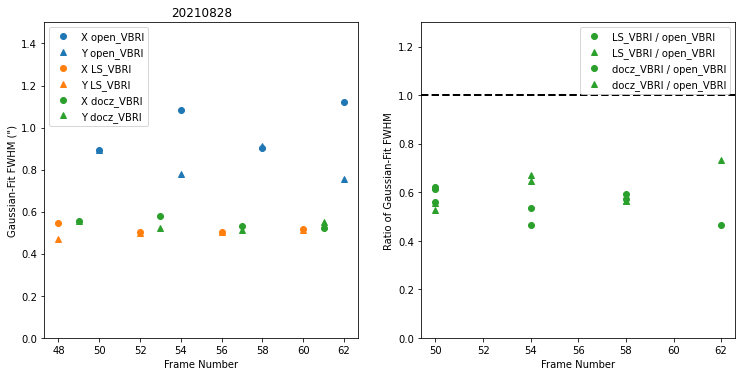

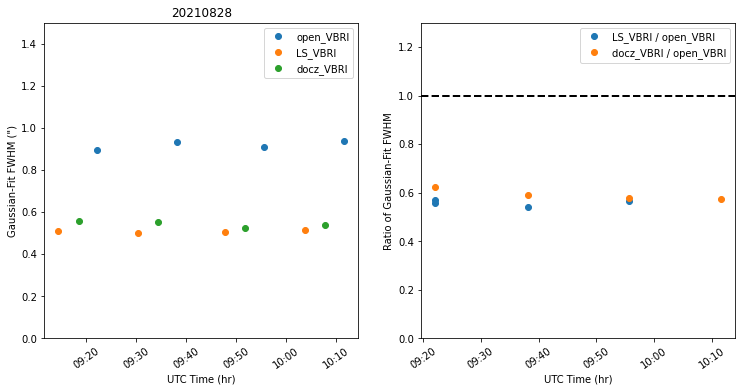

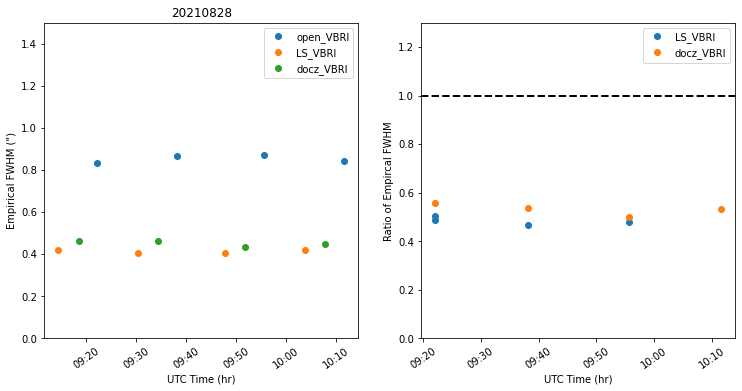

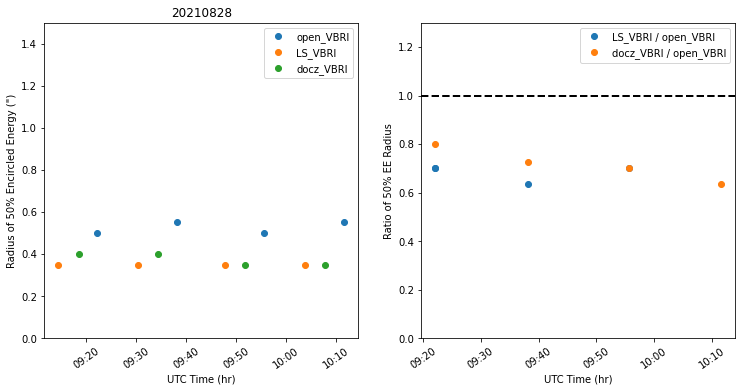

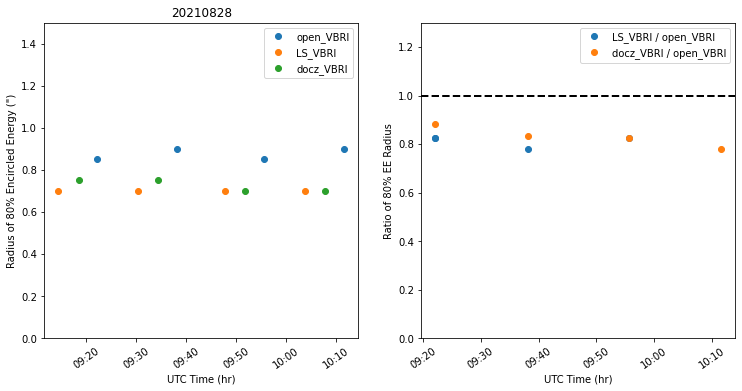

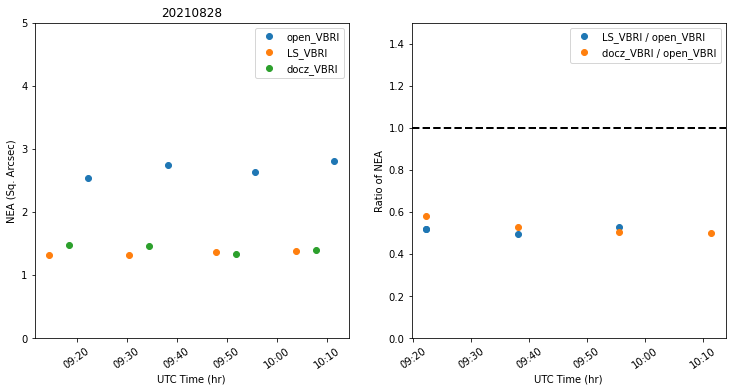

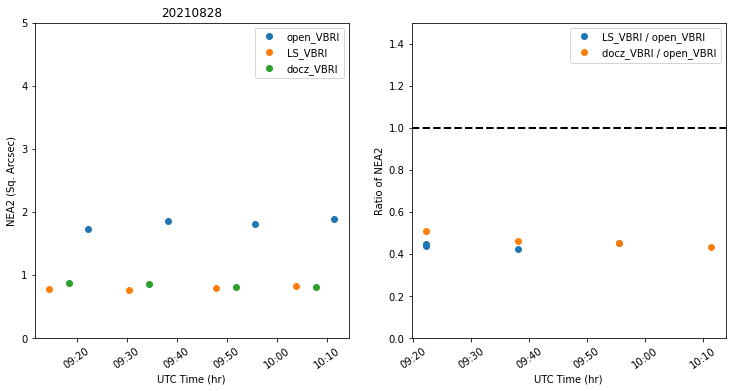

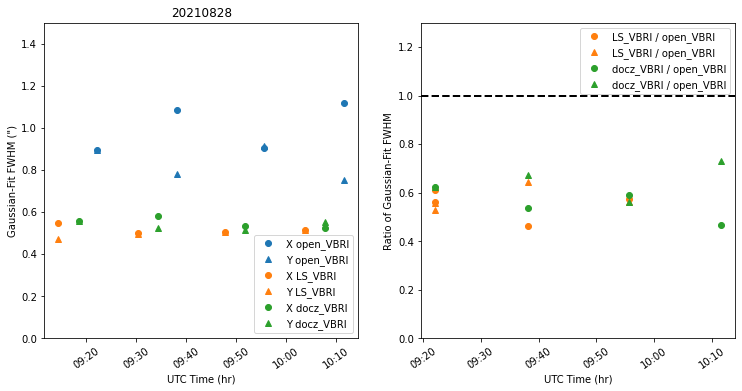

In [11]:
suffixes = ['open_VBRI', 'LS_VBRI', 'docz_VBRI']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

# Time Variation w/MASS-DIMM

Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm


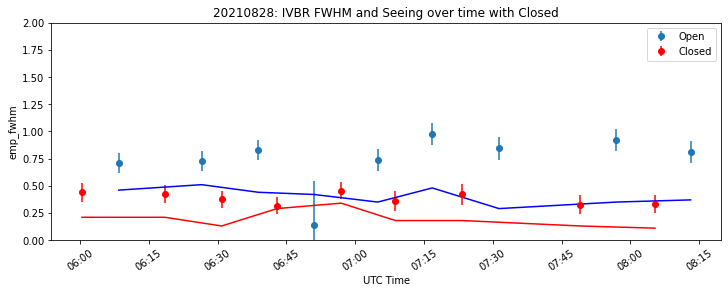

In [14]:
open_file = stats_dir +"stats_open_IVBR_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_IVBR_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', f"{night}: IVBR FWHM and Seeing over time with Closed", plots_dir)

Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm


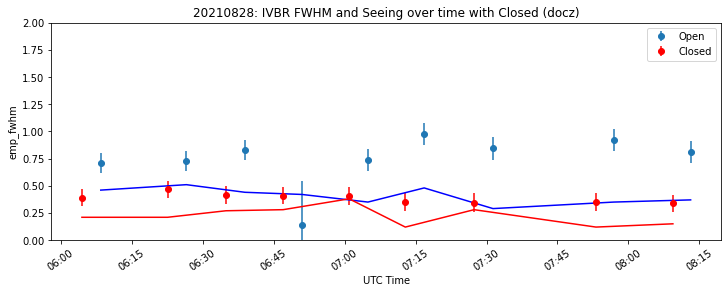

In [15]:
open_file = stats_dir +"stats_open_IVBR_mdp.fits"
closed_file2 = stats_dir+ "stats_docz_IVBR_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', f"{night}: IVBR FWHM and Seeing over time with Closed (docz)", plots_dir)

Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm


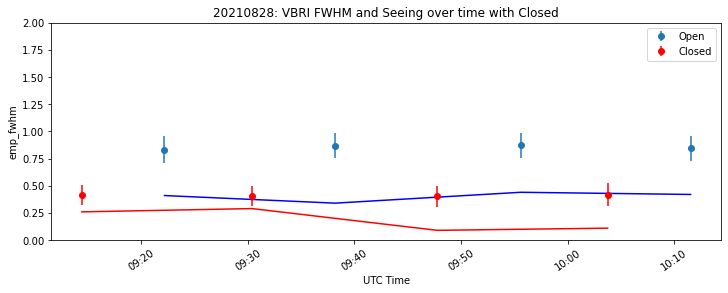

In [16]:
open_file = stats_dir +"stats_open_VBRI_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_VBRI_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', f"{night}: VBRI FWHM and Seeing over time with Closed (LS)", plots_dir)

Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm
Filter not found: defaulting to 500 nm


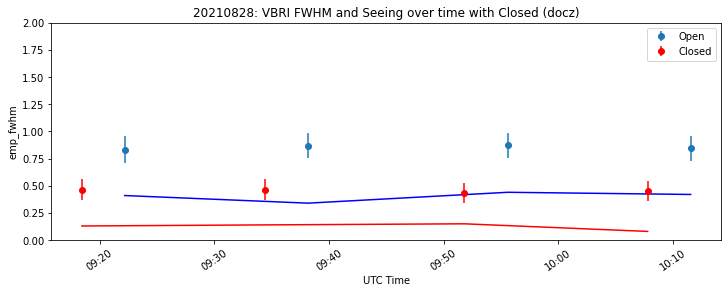

In [17]:
open_file = stats_dir +"stats_open_VBRI_mdp.fits"
closed_file1 = stats_dir+ "stats_docz_VBRI_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', f"{night}: VBRI FWHM and Seeing over time with Closed (docz)", plots_dir)

# Aggregate Plots

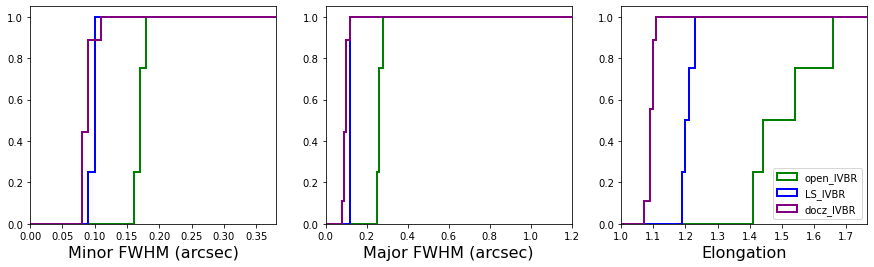

In [29]:
files = [open_file, closed_file1, closed_file2]
labels = ['open_IVBR', 'LS_IVBR', 'docz_IVBR']
colors = ['g', 'b', 'purple', 'orange']
plot_stats.comp_cdf(files, labels, colors)

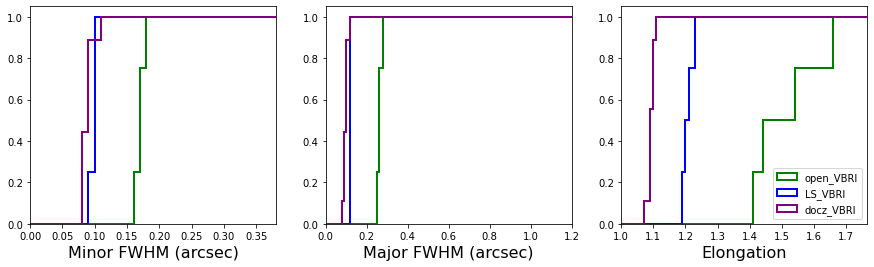

In [20]:
files = [open_file, closed_file1, closed_file2]
labels = ['open_VBRI', 'LS_VBRI', 'docz_VBRI']
colors = ['g', 'b', 'purple', 'orange']
plot_stats.comp_cdf(files, labels, colors)

# Field Variability

In [21]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta030LS_c_scan
Median FWHM           = 0.405"
Median FWHM (clipped) = 0.405"
Mean FWHM             = 0.443"
Mean FWHM (clipped)   = 0.426"
Stddev FWHM           = 0.366"
Stddev FWHM (clipped) = 0.072"


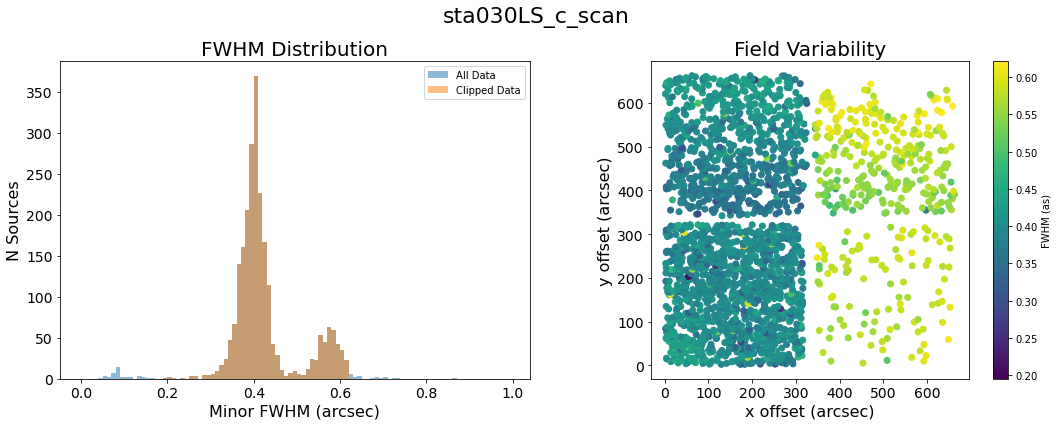

In [22]:
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

Median FWHM           = 0.372"
Median FWHM (clipped) = 0.373"
Mean FWHM             = 0.426"
Mean FWHM (clipped)   = 0.386"
Stddev FWHM           = 0.896"
Stddev FWHM (clipped) = 0.068"


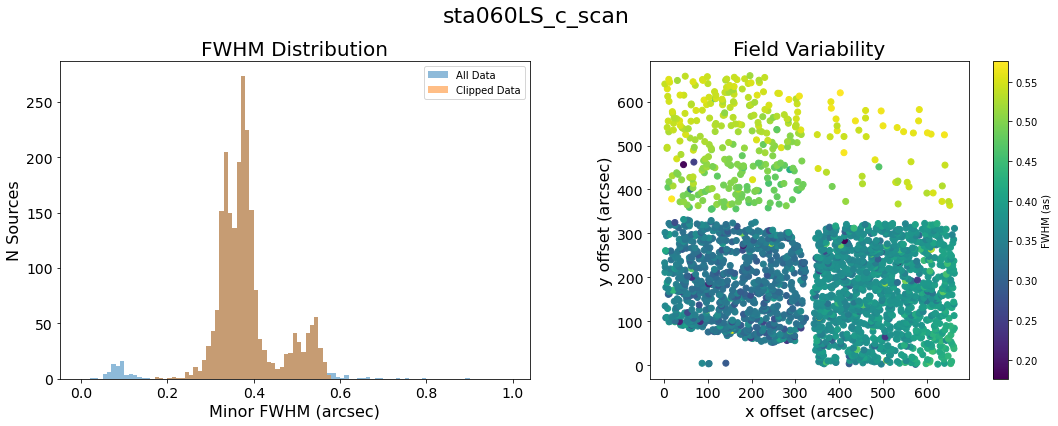

In [24]:
test_img_base = 'sta060LS_c_scan'
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

### Open Loop

Median FWHM           = 0.465"
Median FWHM (clipped) = 0.372"
Mean FWHM             = 10.456"
Mean FWHM (clipped)   = 0.484"
Stddev FWHM           = 1077.170"
Stddev FWHM (clipped) = 0.421"


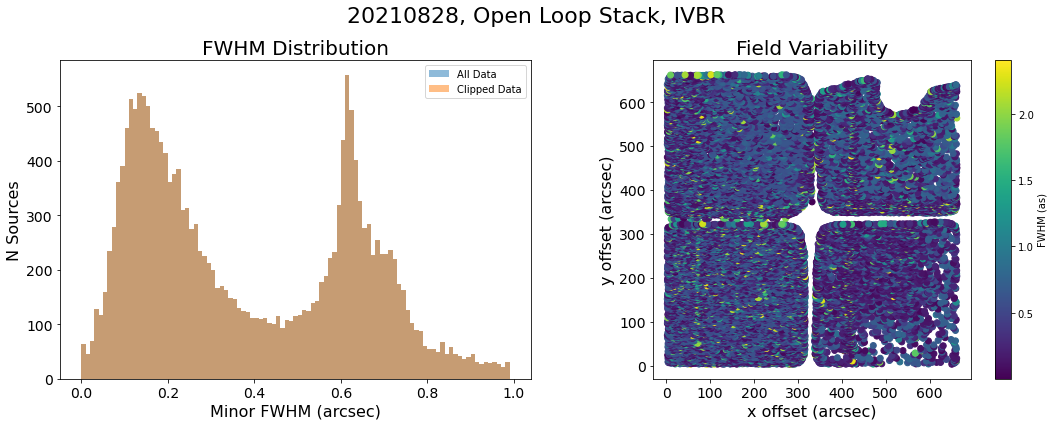

In [13]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

Median FWHM           = 0.396"
Median FWHM (clipped) = 0.352"
Mean FWHM             = 48.824"
Mean FWHM (clipped)   = 0.471"
Stddev FWHM           = 6311.585"
Stddev FWHM (clipped) = 0.368"


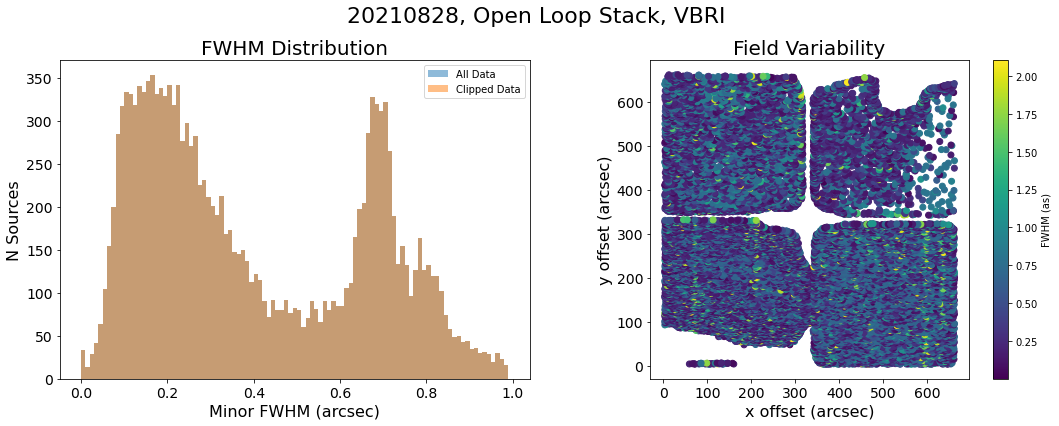

In [5]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

### Closed (LS)

Median FWHM           = 0.240"
Median FWHM (clipped) = 0.240"
Mean FWHM             = inf"
Mean FWHM (clipped)   = 239976400629259403526144.000"
Stddev FWHM           = nan"
Stddev FWHM (clipped) = 98227456781774387341688832.000"


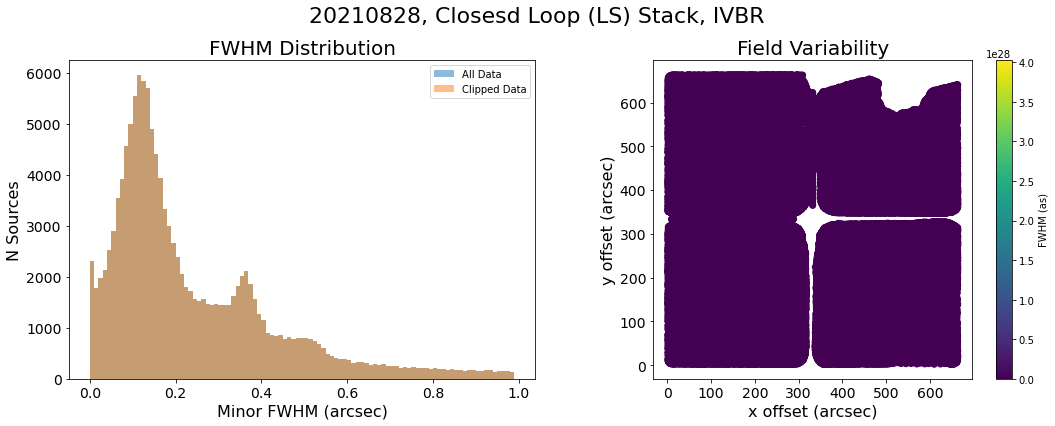

In [6]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closesd Loop (LS) Stack, {filt}")

Median FWHM           = 0.192"
Median FWHM (clipped) = 0.192"
Mean FWHM             = 4087505268034391392402118478397440.000"
Mean FWHM (clipped)   = 1039549.941"
Stddev FWHM           = 1053593632482675767769668573420584960.000"
Stddev FWHM (clipped) = 220928433.356"


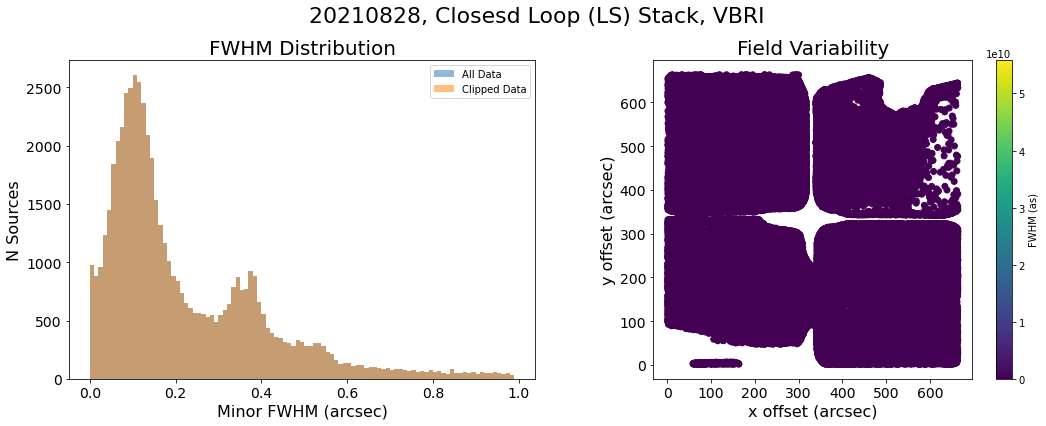

In [8]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closesd Loop (LS) Stack, {filt}")

### Closed (docz2)

Median FWHM           = 0.224"
Median FWHM (clipped) = 0.224"
Mean FWHM             = 5498821379696797116494451546994914613635926578835379057449454263274986675286640973976552295969907726201052320642619146240.000"
Mean FWHM (clipped)   = 417404129301558601587152276946944.000"
Stddev FWHM           = 2084162115788132956732411545243740616612112244395198165581333712492919019098241172135378544683285460634703428243808856309760.000"
Stddev FWHM (clipped) = 158201641878186683249774223905783808.000"


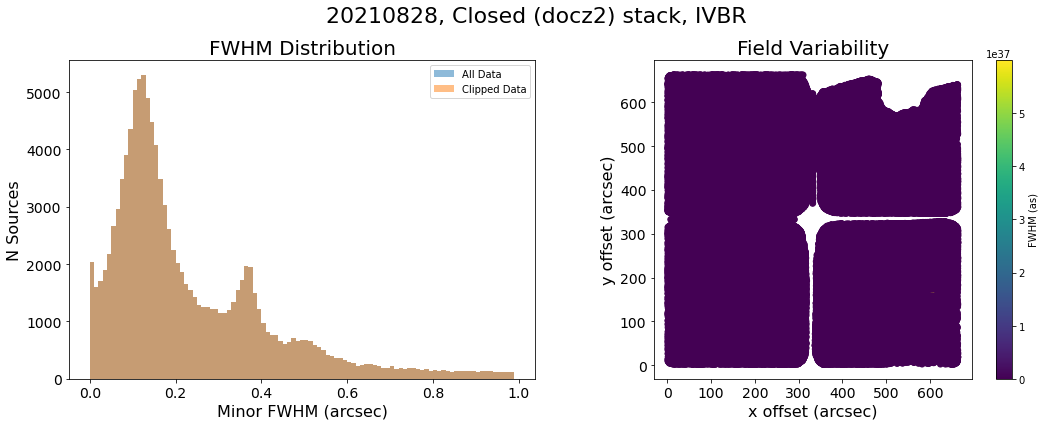

In [9]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

Median FWHM           = 0.232"
Median FWHM (clipped) = 0.232"
Mean FWHM             = 1749615494.343"
Mean FWHM (clipped)   = 1.223"
Stddev FWHM           = 392784803509.784"
Stddev FWHM (clipped) = 6.408"


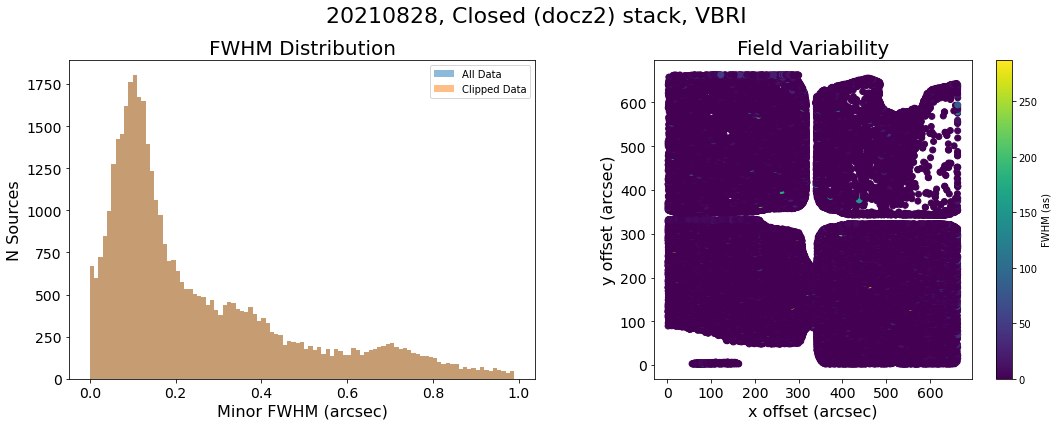

In [11]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

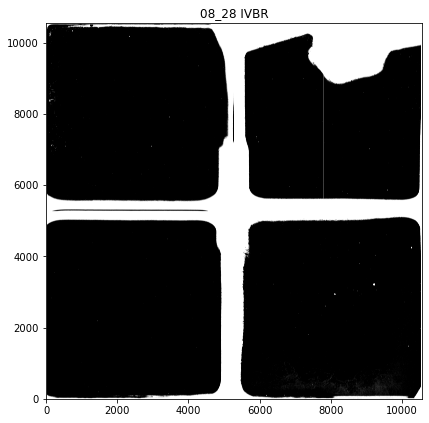

In [45]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_IVBR.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_28 IVBR")
im = plt.imshow(data, origin ='lower', cmap='gray')
#plt.colorbar(im)
plt.tight_layout()
plt.show()
hdul.close()